In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

In [3]:

page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")


Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Absolutely horrible airline....
1,✅ Trip Verified | Having experienced delays a...
2,✅ Trip Verified | Travelled to Heathrow to Kal...
3,Not Verified | This flight failed at every le...
4,Not Verified | Beware of British Airways and ...


In [5]:
df.to_csv("BA_reviews.csv")
df

,reviews
0,✅ Trip Verified | Absolutely horrible airline....
1,✅ Trip Verified | Having experienced delays a...
2,✅ Trip Verified | Travelled to Heathrow to Kal...
3,Not Verified | This flight failed at every le...
4,Not Verified | Beware of British Airways and ...
...,...
995,✅ Trip Verified | London to Paris. I wish tha...
996,✅ Trip Verified | Delivering outstanding cust...
997,✅ Trip Verified | This was a night flight New ...
998,✅ Trip Verified | Amman to London. Appalling ...


In [6]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

# Step 1: Cleaning the text

In [7]:
import pandas as pd

In [8]:
csv_path = "BA_reviews.csv"
df = pd.read_csv(csv_path)
df.reset_index(drop=True, inplace=True)

In [10]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [11]:
print(df['reviews'])

0      ✅ Trip Verified | Absolutely horrible airline....
1      ✅ Trip Verified |  Having experienced delays a...
2      ✅ Trip Verified | Travelled to Heathrow to Kal...
3      Not Verified |  This flight failed at every le...
4      Not Verified |  Beware of British Airways and ...
                             ...                        
995    ✅ Trip Verified |  London to Paris. I wish tha...
996    ✅ Trip Verified |  Delivering outstanding cust...
997    ✅ Trip Verified | This was a night flight New ...
998    ✅ Trip Verified |  Amman to London. Appalling ...
999    ✅ Trip Verified |  Paphos to London Gatwick in...
Name: reviews, Length: 1000, dtype: object


In [13]:
df['reviews'] = df['reviews'].str.strip()
df['reviews']=df['reviews'].str.lstrip('✅ Trip Verified |')
df['reviews']=df['reviews'].str.lstrip('Not Verified |')
df['reviews']= df['reviews'].str.lower()
print(df)

     Unnamed: 0                                            reviews
0             0  absolutely horrible airline. communication is ...
1             1  having experienced delays and cancellations de...
2             2  avelled to heathrow to kalamata and return jou...
3             3  this flight failed at every level. we were del...
4             4  beware of british airways and their marketing ...
..          ...                                                ...
995         995  london to paris. i wish that they would update...
996         996  delivering outstanding customer service onboar...
997         997  his was a night flight new york jfk to london,...
998         998  amman to london. appalling service both on the...
999         999  paphos to london gatwick in club europe. we ha...

[1000 rows x 2 columns]


In [14]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews
0,0,absolutely horrible airline. communication is ...,absolutely horrible airline communication is t...
1,1,having experienced delays and cancellations de...,having experienced delays and cancellations de...
2,2,avelled to heathrow to kalamata and return jou...,avelled to heathrow to kalamata and return jou...
3,3,this flight failed at every level. we were del...,this flight failed at every level we were dela...
4,4,beware of british airways and their marketing ...,beware of british airways and their marketing ...


In [15]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SANDHYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SANDHYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SANDHYA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\SANDHYA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SANDHYA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Unnamed: 0,reviews,Cleaned Reviews,POS tagged
0,0,absolutely horrible airline. communication is ...,absolutely horrible airline communication is t...,"[(absolutely, r), (horrible, a), (airline, n),..."
1,1,having experienced delays and cancellations de...,having experienced delays and cancellations de...,"[(experienced, v), (delays, n), (cancellations..."
2,2,avelled to heathrow to kalamata and return jou...,avelled to heathrow to kalamata and return jou...,"[(avelled, v), (heathrow, v), (kalamata, v), (..."
3,3,this flight failed at every level. we were del...,this flight failed at every level we were dela...,"[(flight, n), (failed, v), (every, None), (lev..."
4,4,beware of british airways and their marketing ...,beware of british airways and their marketing ...,"[(beware, n), (british, a), (airways, n), (mar..."


In [17]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,Lemma
0,0,absolutely horrible airline. communication is ...,absolutely horrible airline communication is t...,"[(absolutely, r), (horrible, a), (airline, n),...",absolutely horrible airline communication te...
1,1,having experienced delays and cancellations de...,having experienced delays and cancellations de...,"[(experienced, v), (delays, n), (cancellations...",experience delay cancellation depart usa eur...
2,2,avelled to heathrow to kalamata and return jou...,avelled to heathrow to kalamata and return jou...,"[(avelled, v), (heathrow, v), (kalamata, v), (...",avelled heathrow kalamata return journey day...
3,3,this flight failed at every level. we were del...,this flight failed at every level we were dela...,"[(flight, n), (failed, v), (every, None), (lev...",flight fail every level delay arrive destina...
4,4,beware of british airways and their marketing ...,beware of british airways and their marketing ...,"[(beware, n), (british, a), (airways, n), (mar...",beware british airway marketing make believe...


In [18]:

df.head()

,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,Lemma
0,0,absolutely horrible airline. communication is ...,absolutely horrible airline communication is t...,"[(absolutely, r), (horrible, a), (airline, n),...",absolutely horrible airline communication te...
1,1,having experienced delays and cancellations de...,having experienced delays and cancellations de...,"[(experienced, v), (delays, n), (cancellations...",experience delay cancellation depart usa eur...
2,2,avelled to heathrow to kalamata and return jou...,avelled to heathrow to kalamata and return jou...,"[(avelled, v), (heathrow, v), (kalamata, v), (...",avelled heathrow kalamata return journey day...
3,3,this flight failed at every level. we were del...,this flight failed at every level we were dela...,"[(flight, n), (failed, v), (every, None), (lev...",flight fail every level delay arrive destina...
4,4,beware of british airways and their marketing ...,beware of british airways and their marketing ...,"[(beware, n), (british, a), (airways, n), (mar...",beware british airway marketing make believe...


In [19]:
df["POS tagged"]

0      [(absolutely, r), (horrible, a), (airline, n),...
1      [(experienced, v), (delays, n), (cancellations...
2      [(avelled, v), (heathrow, v), (kalamata, v), (...
3      [(flight, n), (failed, v), (every, None), (lev...
4      [(beware, n), (british, a), (airways, n), (mar...
                             ...                        
995    [(london, n), (paris, v), (wish, v), (would, N...
996    [(delivering, v), (outstanding, a), (customer,...
997    [(night, n), (flight, n), (new, a), (york, n),...
998    [(amman, n), (london, v), (appalling, a), (ser...
999    [(paphos, n), (london, v), (gatwick, n), (club...
Name: POS tagged, Length: 1000, dtype: object

In [20]:
df[['reviews','Lemma']]

,reviews,Lemma
0,absolutely horrible airline. communication is ...,absolutely horrible airline communication te...
1,having experienced delays and cancellations de...,experience delay cancellation depart usa eur...
2,avelled to heathrow to kalamata and return jou...,avelled heathrow kalamata return journey day...
3,this flight failed at every level. we were del...,flight fail every level delay arrive destina...
4,beware of british airways and their marketing ...,beware british airway marketing make believe...
...,...,...
995,london to paris. i wish that they would update...,london paris wish would update aircraft perh...
996,delivering outstanding customer service onboar...,deliver outstanding customer service onboard...
997,"his was a night flight new york jfk to london,...",night flight new york jfk london difficult a...
998,amman to london. appalling service both on the...,amman london appalling service flight subseq...


In [ ]:
#remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

In [32]:
!pip install vaderSentiment

In [44]:
!pip install wordcloud

In [33]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SANDHYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Calculate polarity to gather sentiment tags.

In [36]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
        
    
df['polarity'] = df['reviews'].apply(polarity_calc)


df['tag'] = df['polarity'].apply(tag_cal)


print(df)


     Unnamed: 0                                            reviews  \
0             0  b   l   u   e   l       h   r   r   b   l   e ...   
1             1  h   v   n   g       e   x   p   e   r   e   n ...   
2             2  v   e   l   l   e           h   e   h   r   w ...   
3             3  h       f   l   g   h       f   l   e         ...   
4             4  b   e   w   r   e       f       b   r   h     ...   
..          ...                                                ...   
995         995  l   n   n           p   r   .           w   h ...   
996         996  e   l   v   e   r   n   g       u   n   n   g ...   
997         997  h       w           n   g   h       f   l   g ...   
998         998  n           l   n   n   .       p   p   l   l ...   
999         999  p   p   h           l   n   n       g   w   c ...   

                                       Cleaned Reviews  \
0    absolutely horrible airline communication is t...   
1    having experienced delays and cancella

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [39]:

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Unnamed: 0,reviews,Cleaned Reviews,POS tagged,Lemma,polarity,tag,Sentiment,Analysis
0,0,b l u e l h r r b l e ...,absolutely horrible airline communication is t...,"[(absolutely, r), (horrible, a), (airline, n),...",absolutely horrible airline communication te...,0.0,Neutral,-0.9117,Negative
1,1,h v n g e x p e r e n ...,having experienced delays and cancellations de...,"[(experienced, v), (delays, n), (cancellations...",experience delay cancellation depart usa eur...,0.0,Neutral,-0.2732,Negative
2,2,v e l l e h e h r w ...,avelled to heathrow to kalamata and return jou...,"[(avelled, v), (heathrow, v), (kalamata, v), (...",avelled heathrow kalamata return journey day...,0.0,Neutral,0.8578,Positive
3,3,h f l g h f l e ...,this flight failed at every level we were dela...,"[(flight, n), (failed, v), (every, None), (lev...",flight fail every level delay arrive destina...,0.0,Neutral,0.8130,Positive
4,4,b e w r e f b r h ...,beware of british airways and their marketing ...,"[(beware, n), (british, a), (airways, n), (mar...",beware british airway marketing make believe...,0.0,Neutral,0.2491,Neutral


In [40]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    503
Negative    385
Neutral     112
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x28746957c40>,
 [Text(-0.010367174777798825, 1.0999511451365132, 'Positive'),
  Text(-0.3693583227850683, -1.0361343684046975, 'Negative'),
  Text(1.2672907463411172, -0.46526784139694655, 'Neutral')],
 [Text(-0.005654822606072086, 0.5999733518926434, '50.3%'),
  Text(-0.2014681760645827, -0.5651642009480168, '38.5%'),
  Text(0.7979238032518144, -0.2929464186573367, '11.2%')])

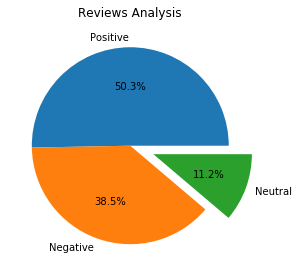

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

# Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [42]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [45]:
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [47]:
text = " "
for ind in df.index:
    if df['tag'][ind] == "Positive":
        text = text + df['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text)

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [49]:
  def getbbox(
    self,
    text,
    mode="",
    direction=None,
    features=None,
    language=None,
    stroke_width=0,
    anchor=None,
)

SyntaxError: invalid syntax (<ipython-input-49-7d32772c94c6>, line 10)

In [ ]:
class TransposedFont:
    def __init__(self, font, orientation=None):
        """
  677         Wrapper that creates a transposed font from any existing fo       object.
  679 
  680         :param font: A font object.
  681         :param orientation: An optional orientation.  If given, this should
  682             be one of Image.Transpose.FLIP_LEFT_RIGHT, Image.Transpose.FLIP_TOP_BOTTOM,
  683             Image.Transpose.ROTATE_90, Image.Transpose.ROTATE_180, or
  684             Image.Transpose.ROTATE_270.
  685         """
  686         self.font = font
  687         self.orientation = orientation  # any 'transpose' argument, or None
  688 
  689     def getmask(self, text, mode="", *args, **kwargs):
  690         im = self.font.getmask(text, mode, *args, **kwargs)
  691         if self.orientation is not None:
  692             return im.transpose(self.orientation)
  693         return im
  694 
  695     def getbbox(self, text, *args, **kwargs):
  696         # TransposedFont doesn't support getmask2, move top-left point to (0, 0)
  697         # this has no effect on ImageFont and simulates anchor="lt" for FreeTypeFont
  698         left, top, right, bottom = self.font.getbbox(text, *args, **kwargs)
  699         width = right - left
  700         height = bottom - top
  701         if self.orientation in (Image.Transpose.ROTATE_90, Image.Transpose.ROTATE_270):
  702             return 0, 0, height, width
  703         return 0, 0, width, height